In [64]:
import numpy as np 
from scipy.fft import fft, ifft
import math

In [65]:
def compute_xk(k):
    res = []
    for i in range(k):
        x_k = ( (i-8)**3 ) / 8
        res.append(x_k)
    return res

In [66]:
def compute_yk(k):
    res = []
    for i in range(k):
        y_k = math.cos( (3*i+1)*math.pi/16 + 1 ) + math.sin( (5*i+1) * math.pi/16 )
        res.append(y_k)
    return res

In [67]:
n = 15
x_k = compute_xk(n)
y_k = compute_yk(n)

In [68]:
X = fft(x_k)
Y = fft(y_k)

In [69]:
X_mag = np.absolute(X)
Y_mag = np.absolute(Y)


In [70]:
idx = np.argpartition(X_mag, 10)[:10]
X_hat = X.copy()
X_hat[idx] = 0

idy = np.argpartition(Y_mag, 10)[:10]
Y_hat = Y.copy()
Y_hat[idy] = 0


In [71]:
x_hat = ifft(X_hat)
y_hat = ifft(Y_hat)

C:\Users\thomp\anaconda3\envs\compression\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


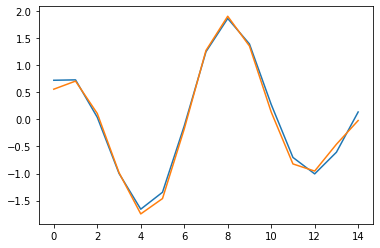

In [72]:
import matplotlib.pyplot as plt

ypoints = y_hat
plt.plot(ypoints)
ypoints2 = y_k
plt.plot(ypoints2)
plt.show()

C:\Users\thomp\anaconda3\envs\compression\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


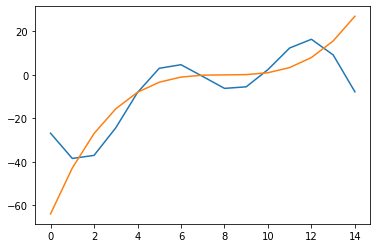

In [73]:
xpoints = x_hat
plt.plot(xpoints)
xpoints2 = x_k
plt.plot(xpoints2)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error


In [75]:
mean_squared_error(y_k, np.absolute(y_hat))

2.0697113715109694

In [76]:
mean_squared_error(x_k, np.absolute(x_hat))

1435.7287585844613

In [77]:
def ssq(v):
    return np.sum( np.square(v) )

In [81]:
def snr(v,v_hat):
    return 10 * np.log10((ssq(v) / ssq(v - v_hat)))

In [82]:
snr(np.abs(x_k), np.abs(x_hat))

5.578903706904734

In [83]:
snr(np.abs(y_k), np.abs(y_hat))

20.65791567512771